<a href="https://colab.research.google.com/github/rajansingh387/Important-projects-without-deployment/blob/main/spam_or_ham_with_rnn_and_LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Drop the columns that are not required for the neural network.
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

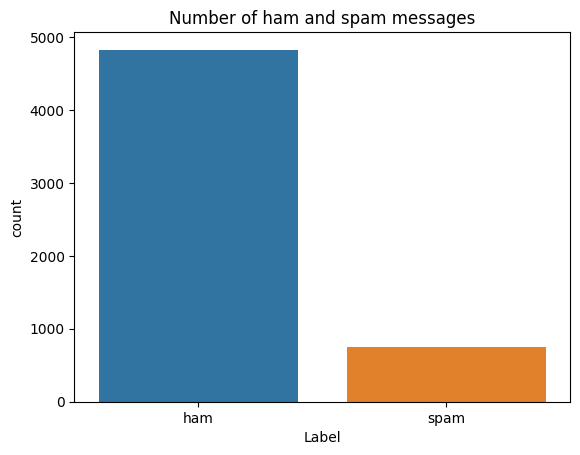

In [ ]:
# Understand the distribution better.
sns.countplot(data=df, x='v1')
plt.xlabel('Label')
plt.title('Number of ham and spam messages');

In [ ]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df.v1.value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

Create input and output vectors.

Process the labels.

In [ ]:
X = df.v2
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
Y = df.v1
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
le.classes_
# ham=0, spam=1

array(['ham', 'spam'], dtype=object)

In [ ]:
Y.shape

(5572,)

In [ ]:
Y = Y.reshape(-1,1)
Y.shape

(5572, 1)

In [ ]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Split into training and test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, random_state=0)

In [ ]:
X_train.shape

(4736,)

In [ ]:
Y_train.shape

(4736, 1)

In [ ]:
X_test.shape

(836,)

In [ ]:
Y_test.shape

(836, 1)

In [ ]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
X_test

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
                              ...                        
4339    I want to sent  &lt;#&gt; mesages today. Thats...
4865    Oh! Shit, I thought that was your trip! Looooo...
2043    4mths half price Orange line rental & latest c...
3855                     I'm ok. Will do my part tomorrow
1034    ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
Name: v2, Length: 836, dtype: object

**Process the data**

Tokenize the data and convert the text to sequences.

Add padding to ensure that all the sequences have the same shape.

In [ ]:
# Top 1000 frequently occurring words
max_words = 1000

# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
tok

In [ ]:

# Transforms each text in texts to a sequence of integers.
sequences = tok.texts_to_sequences(X_train)
sequences

In [ ]:
X_train[100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [ ]:
sequences[100]

[11, 113, 7, 1, 299, 214, 54, 175, 1, 56, 14, 339]

In [ ]:
for i in range(200):
  print(len(sequences[i]), end=" ")

5 13 5 3 8 6 10 5 7 12 15 4 8 6 3 10 8 5 16 27 29 13 10 8 21 16 7 13 6 9 9 8 19 12 10 6 18 42 5 31 18 20 11 7 24 22 11 4 9 15 14 4 6 6 9 3 5 30 13 6 10 10 22 5 16 5 21 21 8 10 10 1 4 18 20 8 17 10 6 13 9 8 6 34 4 5 1 13 20 4 15 3 9 6 10 15 30 13 11 42 12 6 5 5 6 14 3 11 7 5 13 19 27 7 6 12 20 5 29 23 25 13 6 16 19 18 0 14 12 4 25 11 5 20 25 27 11 23 28 12 17 4 2 11 14 3 1 30 31 15 8 10 9 26 23 6 4 26 20 11 33 7 11 5 5 8 26 7 10 20 12 8 10 29 10 9 3 7 5 15 6 6 8 27 25 4 3 9 13 10 39 7 9 14 18 11 16 24 14 7 

In [ ]:
len(sequences)

4736

In [ ]:
l = []
for i in range(len(sequences)):
  l.append(len(sequences[i]))
print(max(l), min(l))

171 0


In [ ]:


from keras.utils import pad_sequences
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,   3, 422,  10],
       [  0,   0,   0, ...,  29,  39, 423],
       [  0,   0,   0, ...,  30,   6,  70],
       ...,
       [  0,   0,   0, ...,  82, 111,  21],
       [  0,   0,   0, ...,   4,  56,   3],
       [  0,   0,   0, ..., 282,   2,   3]], dtype=int32)

In [ ]:
sequences_matrix.shape

(4736, 150)

In [ ]:
for i in range(200):
  print(len(sequences_matrix[i]), end=" ")

150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 

In [ ]:
l = []
for i in range(len(sequences_matrix)):
  l.append(len(sequences_matrix[i]))
print(max(l), min(l))

150 150


**RNN**

Define the RNN structure.

In [ ]:
def RNN():
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(max_words,50,input_length=max_len)(i)
    x = LSTM(64)(x)
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x)
    return model

In [ ]:
# Call the function and compile the model.
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
# Fit on the training data.
r = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 8s 119ms/step - loss: 0.4249 - accuracy: 0.8545 - val_loss: 0.2546 - val_accuracy: 0.8692
Epoch 2/10
30/30 [==============================] - 3s 97ms/step - loss: 0.1802 - accuracy: 0.9417 - val_loss: 0.1033 - val_accuracy: 0.9736
Epoch 3/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0815 - accuracy: 0.9784 - val_loss: 0.0683 - val_accuracy: 0.9873
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0514 - accuracy: 0.9857 - val_loss: 0.0642 - val_accuracy: 0.9884
Epoch 5/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0392 - accuracy: 0.9908 - val_loss: 0.0562 - val_accuracy: 0.9884
Epoch 6/10
30/30 [==============================] - 2s 54ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0599 - val_accuracy: 0.9873


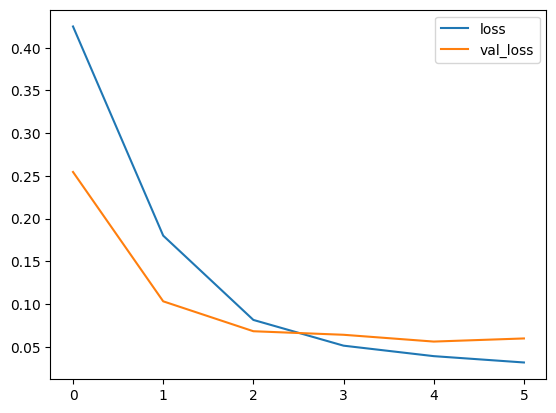

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

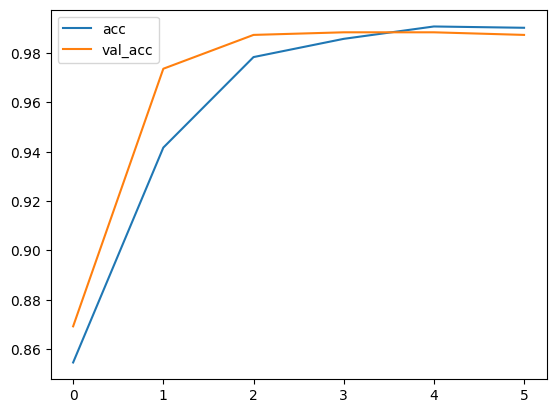

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The model performs well on the validation set and this configuration is chosen as the final model.


In [ ]:
X_test

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
                              ...                        
4339    I want to sent  &lt;#&gt; mesages today. Thats...
4865    Oh! Shit, I thought that was your trip! Looooo...
2043    4mths half price Orange line rental & latest c...
3855                     I'm ok. Will do my part tomorrow
1034    ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
Name: v2, Length: 836, dtype: object

In [ ]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
test_sequences_matrix

array([[  0,   0,   0, ...,  42,  96, 233],
       [  0,   0,   0, ...,  63,   5, 715],
       [  0,   0,   0, ...,  81,  10,   5],
       ...,
       [  0,   0,   0, ...,   2, 518,  21],
       [  0,   0,   0, ...,  11, 377, 158],
       [  0,   0,   0, ..., 869, 369,   6]], dtype=int32)

In [ ]:
test_sequences_matrix.shape

(836, 150)

In [ ]:
# Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - accuracy: 0.9844


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.046
  Accuracy: 0.984
